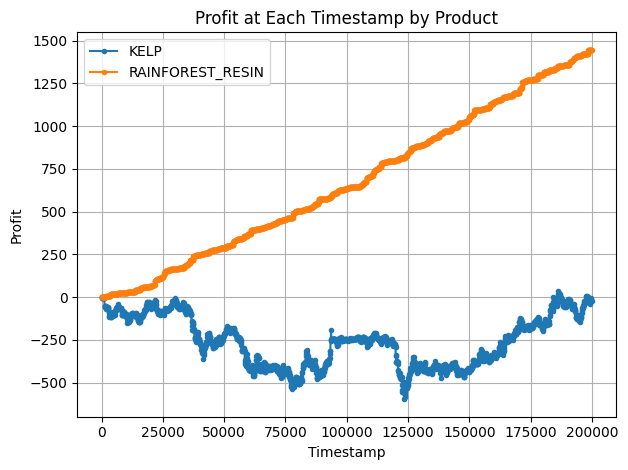

In [1]:
# Re-import necessary packages after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import re

# Reload the log file
log_path = "/Users/kgawande/Downloads/26fdd1d6-5c6e-4d81-ab47-2cd361addf1c.log"
with open(log_path, "r") as f:
    lines = f.readlines()

# Extract timestamp, product, and profit
data = []
pattern = re.compile(r"RAINFOREST_RESIN|KELP")
for line in lines:
    if pattern.search(line):
        parts = line.strip().split(";")
        if len(parts) > 12:
            product = parts[2]
            timestamp = int(parts[1])
            try:
                profit = float(parts[-1])
                data.append((timestamp, product, profit))
            except ValueError:
                continue

# Create DataFrame
df = pd.DataFrame(data, columns=["Timestamp", "Product", "Profit"])
df.sort_values("Timestamp", inplace=True)

# Group by Timestamp and Product, then take the latest profit per timestamp
profit_by_product = df.groupby(["Timestamp", "Product"]).last().reset_index()

# Plot profit per timestamp
fig, ax = plt.subplots()
for product_name, group in profit_by_product.groupby("Product"):
    ax.plot(group["Timestamp"], group["Profit"], label=product_name, marker='.')

ax.set_title("Profit at Each Timestamp by Product")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Profit")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
